In [1]:
## Python essential libraries
import os
from pathlib import Path
import numpy as np
import h5py
from histpy import Histogram

import matplotlib.pyplot as plt
import healpy as hp

In [2]:
# BASE_DIR = os.path.dirname(os.path.abspath(__file__))
# DATA_DIR = os.path.join(BASE_DIR, 'data')
DATA_DIR = Path(os.path.dirname('/Users/penguin/Documents/Grad School/Research/COSI/COSIpy/docs/tutorials/data/'))

In [3]:
FILE_DIR = Path('/Users/penguin/Documents/Grad School/Research/COSI/COSIpy/docs/tutorials/44Ti')

In [4]:
axisNuLambda = 3072
axisEi = 1
axisEm = 1
axisPhi = 60
axisPsiChi = 3072

In [5]:
labels = np.array(['NuLambda', 'Ei', 'Em', 'Phi', 'PsiChi'], dtype='<U8')
labels = np.array(['0', '1', '2', '3', '4'])
shape = np.array([axisNuLambda, axisEi, axisEm, axisPhi, axisPsiChi])

In [6]:
# Define the number of rows (data space) and columns (model space)
# First tensor dot product is R.M, need to sum over model space
NUMROWS = np.prod(shape[2:])
NUMCOLS = np.prod(shape[:2])

NUMROWS, NUMCOLS

(184320, 3072)

### Model Map Format

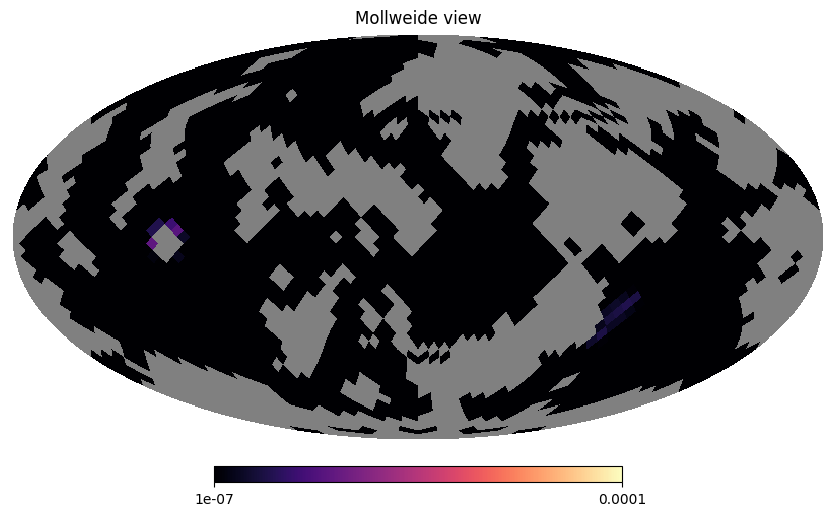

In [19]:
modelmap = h5py.File(FILE_DIR / 'results/model_map_itr50.hdf5', 'r')
data = modelmap['hist']['contents'][:,1]
data[data <= 0] = 1e-12
hp.mollview(np.genfromtxt('outputs/44Ti_3sources_200iter.csv') - data[1:-1], min = 1e-7, max=1e-4, norm ='log', cmap = 'magma')
plt.show()

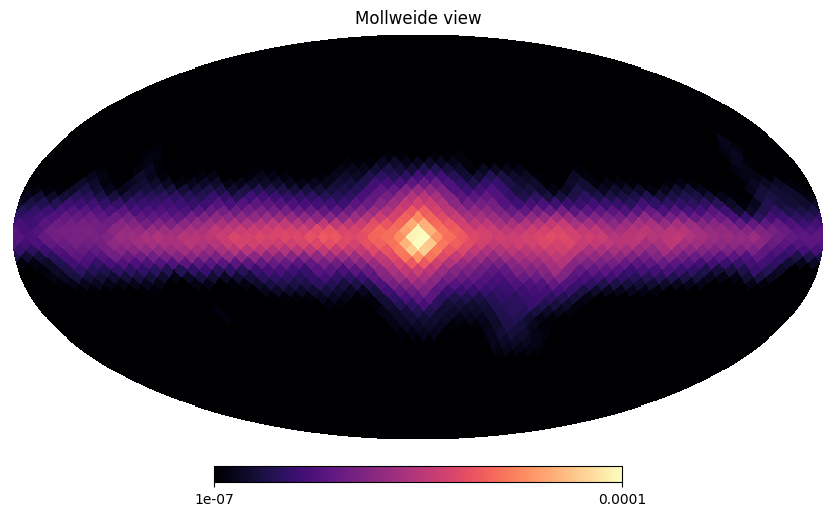

In [11]:
hp.mollview(np.genfromtxt('outputs/511_thindisk_200iter.csv'), min = 1e-7, max=1e-4, norm ='log', cmap = 'magma')
plt.show()

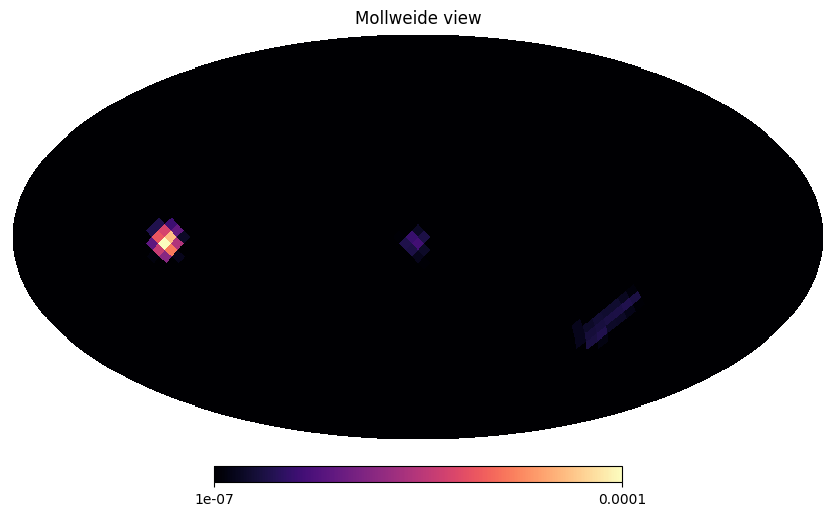

In [6]:
hp.mollview(np.genfromtxt('outputs/Mstep200.csv'), min = 1e-7, max=1e-4, norm ='log', cmap = 'magma')
plt.show()

### Plotting speed up

In [ ]:
# All timing information obtained from Expanse run
# _S --> Intermediate files are saved
# _LL --> Both data vectors and response matrix is placed in the lustre filesystem
# _ --> Only response matrix is placed in the lustre filesystem. Data vectors are in the same directory as the python script.